In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

In [167]:
product_df=pd.read_csv(r'C:\Users\Kashish Gandhi\Desktop\CoDivas_CollegeId\products_final_data.csv')

In [168]:
product_df['date'] = pd.to_datetime(product_df['date'], format='%d-%m-%Y %H:%M')

In [169]:
product_df.head()

,name,img,price,mrp,rating,ratingTotal,discount,seller,purl,target_audience,main_category,subcategory,date,quantity,product_id
0,Men Cotton Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",274,499.0,4.2,25400,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,Male,Top Wear,T-Shirt,2022-06-01,988,1000
1,Women Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",551,1199.0,4.5,3400,54,DILLINGER,https://www.myntra.com/tshirts/dillinger/dilli...,Female,Top Wear,T-Shirt,2022-04-01,958,1001
2,Typography Print T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",296,1099.0,4.0,18400,73,Huetrap,https://www.myntra.com/tshirts/huetrap/huetrap...,Unisex,Top Wear,T-Shirt,2020-05-01,989,1002
3,Printed Round Neck Pure Cotton T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",494,899.0,4.2,3800,45,Roadster,https://www.myntra.com/tshirts/roadster/roadst...,Unisex,Top Wear,T-Shirt,2022-06-01,966,1003
4,Boys Pack of 5 T-shirt,"https://assets.myntassets.com/f_webp,dpr_1.0,q...",699,4995.0,4.1,1200,86,HELLCAT,https://www.myntra.com/tshirts/hellcat/hellcat...,Male,Top Wear,T-Shirt,2023-05-01,953,1004


C:\Users\Kashish Gandhi\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


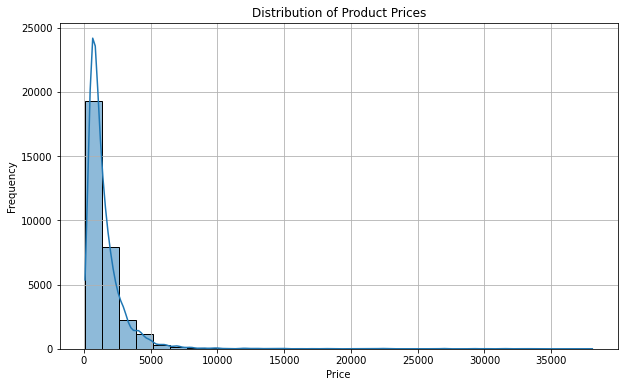

In [170]:
plt.figure(figsize=(10, 6))
sns.histplot(product_df['price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\Kashish Gandhi\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


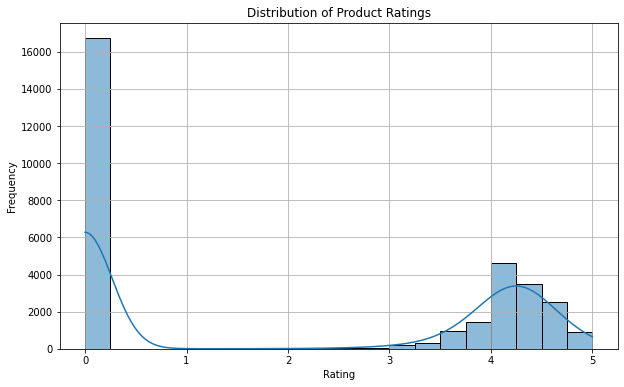

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(product_df['rating'], bins=20, kde=True)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

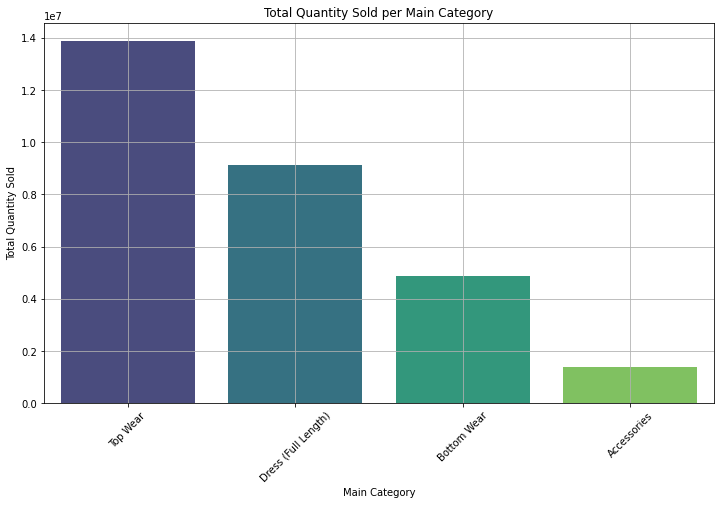

In [172]:
plt.figure(figsize=(12, 7))
category_sales = product_df.groupby('main_category')['quantity'].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette='viridis')
plt.title('Total Quantity Sold per Main Category')
plt.xlabel('Main Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

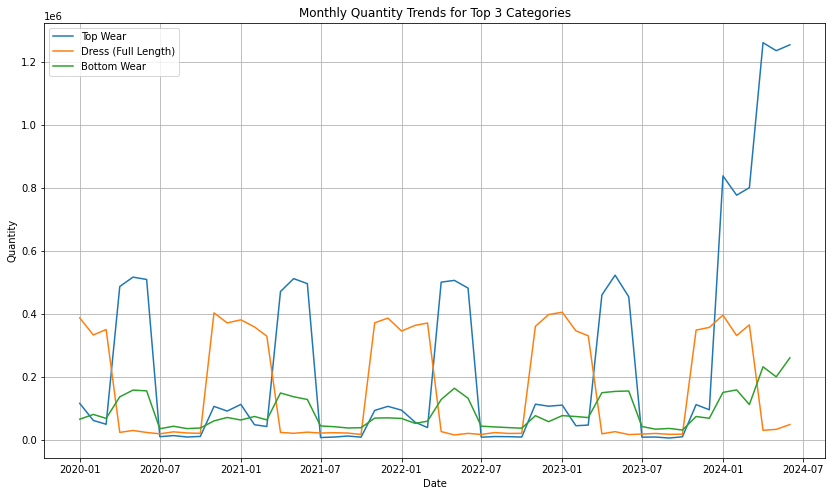

In [173]:
top_categories = product_df['main_category'].value_counts().head(3).index

plt.figure(figsize=(14, 8))
for category in top_categories:
    subset = product_df[product_df['main_category'] == category]
    monthly_sales = subset.groupby(subset['date'].dt.to_period('M')).agg({'quantity':'sum'})
    plt.plot(monthly_sales.index.to_timestamp(), monthly_sales['quantity'], label=category)

plt.title('Monthly Quantity Trends for Top 3 Categories')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [174]:
df=product_df

Checking highest sales for June 2024

In [176]:
target_month = 6 
target_year = 2024
df_june_2024 = df[(df['date'].dt.month == target_month) & (df['date'].dt.year == target_year)]

In [177]:
df_june_2024_filtered = df_june_2024[~df_june_2024['name'].str.contains('Infant', case=False, na=False)]

In [181]:
df_sorted_june_2024 = df_june_2024_filtered.sort_values(by='quantity', ascending=False)
top_10_june_2024 = df_sorted_june_2024.groupby('main_category').head(100)

In [182]:
def display_top_5(df, main_category, target_audience):
    filtered_df = df[(df['main_category'] == main_category) & (df['target_audience'] == target_audience)]
    return filtered_df.head(5)

categories = ['Top Wear', 'Bottom Wear', 'Dress (Full Length)']
audiences = ['Male', 'Female', 'Unisex']

In [183]:
for category in categories:
    print(f"\nTop 5 Products in {category}:")
    for audience in audiences:
        print(f"\nTop 5 for {audience} in {category}:")
        top_5 = display_top_5(top_10_june_2024, category, audience)
        print(top_5[['name', 'main_category', 'price', 'quantity', 'date']])


Top 5 Products in Top Wear:

Top 5 for Male in Top Wear:
                            name main_category  price  quantity       date
17795  Solid Polo Collar T-shirt      Top Wear    647      2441 2024-06-01
14950  Men Polo Slim Fit T-shirt      Top Wear    854      2437 2024-06-01
18847  Solid Polo Collar T-shirt      Top Wear    449      2429 2024-06-01
13002   Classic Fit L.12.12 Polo      Top Wear   6250      2424 2024-06-01
27129    Men Polo Collar T-shirt      Top Wear   3999      2423 2024-06-01

Top 5 for Female in Top Wear:
                                 name main_category  price  quantity  \
24279           Corset Style Crop Top      Top Wear   2309      2800   
24291       Striped Crop Sweater Vest      Top Wear    599      2419   
20488    Women Open Knit Sweater Vest      Top Wear    499      2415   
12574  Pack Of 2 Cotton Crop Tank Top      Top Wear    899      2409   
6243       Sleeveless Sports Tank Top      Top Wear    749      2366   

            date  
24279 202

Predicting Seasonal and Fashion Trends for July 2024 based on consistency and spikes in quantities

In [234]:
df_july_past_years = df[(df['date'].dt.month == 7) & (df['date'].dt.year < target_year)]
df_july_past_years_filtered = df_july_past_years[~df_july_past_years['name'].str.contains('Infant', case=False, na=False)]
seasonal_top_products = df_july_past_years_filtered.groupby(['main_category', 'target_audience']).apply(
    lambda x: x.nlargest(10, 'quantity')
).reset_index(drop=True)

C:\Users\Kashish Gandhi\AppData\Local\Temp\ipykernel_14208\3724982975.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  seasonal_top_products = df_july_past_years_filtered.groupby(['main_category', 'target_audience']).apply(


In [241]:
df_recent_months = df[(df['date'] >= '2024-05-01') & (df['date'] <= '2024-06-30')]
df_recent_months_filtered = df_recent_months[~df_recent_months['name'].str.contains('Infant', case=False, na=False)]
df_recent_months_filtered = df_recent_months_filtered[~df_recent_months_filtered['name'].str.contains('Bra', case=False, na=False)]
recent_spike_products = df_recent_months_filtered.groupby(['main_category', 'target_audience', 'name']).agg(
    quantity_sum=('quantity', 'sum'),
    last_month_quantity=('quantity', lambda x: x.iloc[-1]),
    last_month_date=('date', lambda x: x.iloc[-1])
).reset_index()

df_july_2023 = df[(df['date'].dt.month == 7) & (df['date'].dt.year == 2023)]
df_july_2023_filtered = df_july_2023[~df_july_2023['name'].str.contains('Infant', case=False, na=False)]
df_july_2023_filtered = df_july_2023_filtered[~df_july_2023_filtered['name'].str.contains('Bra', case=False, na=False)]
previous_year_products = df_july_2023_filtered.groupby(['main_category', 'target_audience', 'name']).agg(
    quantity_sum_last_year=('quantity', 'sum')
).reset_index()

recent_spike_products = recent_spike_products.merge(previous_year_products, on=['main_category', 'target_audience', 'name'], how='left', suffixes=('', '_last_year'))
recent_spike_products['quantity_sum_last_year'] = recent_spike_products['quantity_sum_last_year'].fillna(0)

recent_spike_products['has_spike'] = recent_spike_products['quantity_sum'] > recent_spike_products['quantity_sum_last_year'] * 1.5
recent_spike_products['weight'] = recent_spike_products['quantity_sum_last_year'].apply(lambda x: 2 if x == 0 else 1)
recent_spike_products['weighted_spike'] = recent_spike_products['has_spike'] * recent_spike_products['quantity_sum'] * recent_spike_products['weight']

fashion_trend_products = recent_spike_products[recent_spike_products['has_spike']].sort_values(by=['weighted_spike', 'quantity_sum'], ascending=[False, False])
fashion_top_products = fashion_trend_products.groupby(['main_category', 'target_audience']).head(10).reset_index(drop=True)


In [242]:
print("Seasonal Top 10 Products for July 2024:")
for category in categories:
    print(f"\nSeasonal Top 10 Products in {category}:")
    for audience in audiences:
        print(f"\nSeasonal Top 10 for {audience} in {category}:")
        seasonal_top_5 = seasonal_top_products[(seasonal_top_products['main_category'] == category) & (seasonal_top_products['target_audience'] == audience)]
        if not seasonal_top_5.empty:
            print(seasonal_top_5[['name', 'main_category', 'quantity']])
        else:
            print(f"No data available for {audience} in {category}.")

print("\nFashion Trend Top 10 Products for July 2024:")
for category in categories:
    print(f"\nFashion Trend Top 10 Products in {category}:")
    for audience in audiences:
        print(f"\nFashion Trend Top 10 for {audience} in {category}:")
        fashion_top_5 = fashion_top_products[(fashion_top_products['main_category'] == category) & (fashion_top_products['target_audience'] == audience)]
        if not fashion_top_5.empty:
            print(fashion_top_5[['name', 'main_category', 'quantity_sum']])
        else:
            print(f"No data available for {audience} in {category}.")


Seasonal Top 10 Products for July 2024:

Seasonal Top 10 Products in Top Wear:

Seasonal Top 10 for Male in Top Wear:
                          name main_category  quantity
80       Slim Fit Formal Shirt      Top Wear       399
81                Formal Shirt      Top Wear       398
82          Solid Formal Shirt      Top Wear       397
83  Spread Collar Casual Shirt      Top Wear       397
84   Boys Printed Casual Shirt      Top Wear       396
85    Regular Fit Casual Shirt      Top Wear       396
86    Boys Cotton Casual Shirt      Top Wear       396
87        Boys Easy-Iron Shirt      Top Wear       395
88   Boys Printed Cotton Shirt      Top Wear       394
89           Boys Casual Shirt      Top Wear       394

Seasonal Top 10 for Female in Top Wear:
                              name main_category  quantity
70  Girl Sustainable Cotton Tshirt      Top Wear       399
71       Shirt Collar Sheath Dress      Top Wear       399
72    Shirt Collar Shirt Style Top      Top Wear       399
